In [1]:
#Aplicação para detecção de anomalias 

Para a construção de um modelo utilizando o Spark e MLlib são necessários 6 passos:

#1) Construir e iniciar a seção SPARK
#2) Implementar o carregamento dos dados para o spark: Carregar o arquivo, especificar o formato desejado e lê os dados como um Dataframe do Spark
#3) Identificar as características a serem utilizadas para treinamento e teste do modelo
#4) Instanciar as classes e os objetos dos algoritmos a serem utilizados
#5) Utilizar o método fit() para realizar o treinamento do modelo
#6) Avaliar o modelo

In [3]:
from pyspark.sql import SparkSession #importa a biblioteca que cria a seção do spark

In [4]:
#inicia a seção para a utilização do spark
spark = SparkSession.builder.appName("DeteccaoAnomalias").getOrCreate() #cria a seção caso não exista ou obtém a já criada

In [5]:
%fs ls /FileStore/tables

path,name,size
dbfs:/FileStore/tables/Mall_Customers.csv,Mall_Customers.csv,4286
dbfs:/FileStore/tables/adult_data.csv,adult_data.csv,5608318
dbfs:/FileStore/tables/d1995_07_01_24d0c.json,d1995_07_01_24d0c.json,7451741
dbfs:/FileStore/tables/d1995_07_02_c3f44.json,d1995_07_02_c3f44.json,9572086
dbfs:/FileStore/tables/d1995_07_03_f99af.json,d1995_07_03_f99af.json,14125303
dbfs:/FileStore/tables/d1995_07_04_c5a7f.json,d1995_07_04_c5a7f.json,12030333
dbfs:/FileStore/tables/d1995_07_05_0f261.json,d1995_07_05_0f261.json,14662194
dbfs:/FileStore/tables/d1995_07_06_20619.json,d1995_07_06_20619.json,15557682
dbfs:/FileStore/tables/d1995_07_07_2dd8d.json,d1995_07_07_2dd8d.json,15279295
dbfs:/FileStore/tables/d1995_07_08_83302.json,d1995_07_08_83302.json,7033852


In [6]:
diretorioDataset="/FileStore/tables/temperature.csv"  #diretório que contém o arquivo a ser utilizado

In [7]:
data = spark.read.format("csv").options(header="true", inferschema="true").load(diretorioDataset)  #realiza a leitura do dataset

In [8]:
data.show(5, False)

+-------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-----------------+-------------+-----+---------+---------+
datetime |Vancouver |Portland |San Francisco|Seattle |Los Angeles |San Diego |Las Vegas |Phoenix |Albuquerque |Denver |San Antonio |Dallas |Houston |Kansas City |Minneapolis |Saint Louis |Chicago |Nashville |Indianapolis |Atlanta |Detroit |Jacksonville |Charlotte |Miami |Pittsburgh |Toronto |Philadelphia |New York |Montreal |Boston |Beersheba |Tel Aviv District|Eilat |Haifa|Nahariyya|Jerusalem|
+-------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-----------------+-------------+-----+---------+---------+
2012-10-01 12:00:00|null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |null |309.1 |null |null |null |
2012-10-01 13:00:00|284.63 |282.08 |289.48 |281.8 |291.87 |291.53 |293.41 |296.6 |285.12 |284.61 |289.29 |289.74 |288.27 |289.98 |286.87 |286.18 |284.01 |287.41 |283.85 |294.03 |284.03 |298.17 |288.65 |299.72 |281.0 |286.26 |285.63 |288.22 |285.83 |287.17 |307.59 |305.47 |310.58 |304.4|304.4 |303.5 |
2012-10-01 14:00:00|284.62904131 |282.083251974|289.474992813|281.797216632|291.868185522|291.533500952|293.403141271|296.608508543|285.154558187|284.607305531|289.303648787|289.762974207|288.297575758|289.997635363|286.893635588|286.185246029|284.054690974|287.42136028 |283.889393939|294.03534141 |284.069789234|298.205229759|288.650172214|299.732517698|281.024767377|286.262540958|285.663207797|288.24767617 |285.834649953|287.186092094|307.59 |304.31 |310.495769231|304.4|304.4 |303.5 |
2012-10-01 15:00:00|284.626997923|282.091866475|289.460618112|281.789832606|291.862844459|291.543355079|293.392177052|296.631487354|285.233951595|284.5999178 |289.338496754|289.830766948|288.334343434|290.038150556|286.951400772|286.199194111|284.177412183|287.454636935|283.941919192|294.049702185|284.173964682|298.299595186|288.650581705|299.76657946 |281.088318736|286.269518418|285.756824139|288.326939663|285.847789539|287.23167159 |307.391512749|304.281841331 |310.411538462|304.4|304.4 |303.5 |
2012-10-01 16:00:00|284.624954535|282.100480976|289.446243412|281.78244858 |291.857503395|291.553209206|293.381212832|296.654466164|285.313345004|284.59253007 |289.373344722|289.89855969 |288.371111111|290.07866575 |287.009165955|286.213142193|284.300133393|287.48791359 |283.994444444|294.064062959|284.278140131|298.393960613|288.650991196|299.800641223|281.151870096|286.276495879|285.85044048 |288.406203155|285.860929124|287.277251086|307.145199718|304.238014609 |310.327307692|304.4|304.4 |303.5 |
+-------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-----------------+-------------+-----+---------+---------+
only showing top 5 row

In [9]:
data.columns #mostra as colunas do dataset

Out[48]: ['datetime',
 'Vancouver',
 'Portland',
 'San Francisco',
 'Seattle',
 'Los Angeles',
 'San Diego',
 'Las Vegas',
 'Phoenix',
 'Albuquerque',
 'Denver',
 'San Antonio',
 'Dallas',
 'Houston',
 'Kansas City',
 'Minneapolis',
 'Saint Louis',
 'Chicago',
 'Nashville',
 'Indianapolis',
 'Atlanta',
 'Detroit',
 'Jacksonville',
 'Charlotte',
 'Miami',
 'Pittsburgh',
 'Toronto',
 'Philadelphia',
 'New York',
 'Montreal',
 'Boston',
 'Beersheba',
 'Tel Aviv District',
 'Eilat',
 'Haifa',
 'Nahariyya',
 'Jerusalem']

In [10]:
data.printSchema()

root
-- datetime: string (nullable = true)
-- Vancouver: double (nullable = true)
-- Portland: double (nullable = true)
-- San Francisco: double (nullable = true)
-- Seattle: double (nullable = true)
-- Los Angeles: double (nullable = true)
-- San Diego: double (nullable = true)
-- Las Vegas: double (nullable = true)
-- Phoenix: double (nullable = true)
-- Albuquerque: double (nullable = true)
-- Denver: double (nullable = true)
-- San Antonio: double (nullable = true)
-- Dallas: double (nullable = true)
-- Houston: double (nullable = true)
-- Kansas City: double (nullable = true)
-- Minneapolis: double (nullable = true)
-- Saint Louis: double (nullable = true)
-- Chicago: double (nullable = true)
-- Nashville: double (nullable = true)
-- Indianapolis: double (nullable = true)
-- Atlanta: double (nullable = true)
-- Detroit: double (nullable = true)
-- Jacksonville: double (nullable = true)
-- Charlotte: double (nullable = true)
-- Miami: double (nullable = true)
-- Pittsburgh: double (nullable = true)
-- Toronto: double (nullable = true)
-- Philadelphia: double (nullable = true)
-- New York: double (nullable = true)
-- Montreal: double (nullable = true)
-- Boston: double (nullable = true)
-- Beersheba: double (nullable = true)
-- Tel Aviv District: double (nullable = true)
-- Eilat: double (nullable = true)
-- Haifa: double (nullable = true)
-- Nahariyya: double (nullable = true)
-- Jerusalem: double (nullable = true)

In [11]:
data.count()  #conta a quantidade de registros

Out[50]: 45253

In [12]:
#selecionando apenas o datatime e a coluna da cidade de Vancouver
dataAnalise = data.select('datetime', 'Vancouver')

In [13]:
dataAnalise.show(5)

+-------------------+-------------+
 datetime| Vancouver|
+-------------------+-------------+
2012-10-01 12:00:00| null|
2012-10-01 13:00:00| 284.63|
2012-10-01 14:00:00| 284.62904131|
2012-10-01 15:00:00|284.626997923|
2012-10-01 16:00:00|284.624954535|
+-------------------+-------------+
only showing top 5 rows

Tratando os dados

In [15]:
#filtrando apenas os dados que não possuem valores nulos 
from pyspark.sql.functions import col

dataNotNull = dataAnalise.filter(col('Vancouver').isNotNull())

In [16]:
dataNotNull.show(5)

+-------------------+-------------+
 datetime| Vancouver|
+-------------------+-------------+
2012-10-01 13:00:00| 284.63|
2012-10-01 14:00:00| 284.62904131|
2012-10-01 15:00:00|284.626997923|
2012-10-01 16:00:00|284.624954535|
2012-10-01 17:00:00|284.622911147|
+-------------------+-------------+
only showing top 5 rows

In [17]:
from pyspark.sql.functions import monotonically_increasing_id  #biblioteca para a construção dos índices

df_plots = dataNotNull.withColumn("indice", monotonically_increasing_id())  #cria os indices para realizar o plot

In [18]:
df_plots.show(5)

+-------------------+-------------+------+
 datetime| Vancouver|indice|
+-------------------+-------------+------+
2012-10-01 13:00:00| 284.63| 0|
2012-10-01 14:00:00| 284.62904131| 1|
2012-10-01 15:00:00|284.626997923| 2|
2012-10-01 16:00:00|284.624954535| 3|
2012-10-01 17:00:00|284.622911147| 4|
+-------------------+-------------+------+
only showing top 5 rows

In [19]:
#mostrando os dados
display(df_plots.select("indice", "Vancouver"))

indice,Vancouver
0,284.63
1,284.62904131
2,284.626997923
3,284.624954535
4,284.622911147
5,284.620867759
6,284.618824371
7,284.616780983
8,284.614737595
9,284.612694207


Aplicando o histograma para detecção de anomalias

In [21]:
#encontrando a média 
import numpy as np #biblioteca utilizada para tratar vetores e matrizes
from pyspark.sql.functions import mean, stddev #funções para encontrar a média e desvio padrão

In [22]:
list_stats = dataNotNull.select(mean(col('Vancouver')).alias('media'), stddev(col('Vancouver')).alias('desvioPadrao')).collect() #cria uma lista com os valores

In [23]:
media = list_stats[0]['media']
desvio = list_stats[0]['desvioPadrao']

print("Média: ", media)
print("Desvio Padrão: ", desvio)

Média: 283.86265374154124
Desvio Padrão: 6.640130616770929

In [24]:
df_stats = dataNotNull.select(mean(col('Vancouver')).alias('media'), stddev(col('Vancouver')).alias('desvioPadrao')) #cria o dataset com a média e o desvio padrão

In [25]:
df_stats.show()

+------------------+-----------------+
 media| desvioPadrao|
+------------------+-----------------+
283.86265374154124|6.640130616770929|
+------------------+-----------------+

In [26]:
#utilizando a função describe
dataNotNull.describe().show()

+-------+-------------------+------------------+
summary| datetime| Vancouver|
+-------+-------------------+------------------+
 count| 44458| 44458|
 mean| null|283.86265374154124|
 stddev| null| 6.640130616770929|
 min|2012-10-01 13:00:00| 245.15|
 max|2017-10-28 00:00:00| 307.0|
+-------+-------------------+------------------+

In [27]:
#definindo a funcao distancia
def distancia(x):
  media = 283.8626
  desvio = 6.6401
  return ((x - media)/desvio)

#definindo a funcao para verificar anomalias mais do que 2 desvios padrões (95% dos dados)
def anomalias(x):
  desvio = 6.6401
  if (x > 2):
    return 1
  else:
    return 0

#definindo as funções a serem utilizadas (registrando)
from pyspark.sql.types import DoubleType, IntegerType

distancia_udf_double = udf(lambda z: distancia(z), DoubleType())
anomalia_udf_int = udf(lambda z: anomalias(z), IntegerType())

In [28]:
data_new = dataNotNull.select('Vancouver', distancia_udf_double('Vancouver').alias('distancia'))
data_new.show()

+-------------+-------------------+
 Vancouver| distancia|
+-------------+-------------------+
 284.63|0.11557054863631709|
 284.62904131|0.11542616978660031|
284.626997923|0.11511843541512777|
284.624954535| 0.1148107008930567|
284.622911147|0.11450296637099419|
284.620867759| 0.1141952318489231|
284.618824371|0.11388749732685204|
284.616780983|0.11357976280478096|
284.614737595| 0.1132720282827099|
284.612694207|0.11296429376063881|
284.610650819|0.11265655923856774|
284.608607431|0.11234882471649667|
284.606564043| 0.1120410901944256|
284.604520655|0.11173335567235451|
284.602477267|0.11142562115028344|
284.600433879|0.11111788662821237|
284.598390491| 0.1108101521061413|
284.596347103|0.11050241758407878|
284.594303716|0.11019468321260625|
284.592260328|0.10988694869053518|
+-------------+-------------------+
only showing top 20 rows

In [29]:
from  pyspark.sql.functions import abs   #biblioteca necessária para cálculo do valor absoluto

data_new = data_new.select('Vancouver', 'distancia', abs(col('distancia')).alias("distanciaABS"))
data_new.show()

+-------------+-------------------+-------------------+
 Vancouver| distancia| distanciaABS|
+-------------+-------------------+-------------------+
 284.63|0.11557054863631709|0.11557054863631709|
 284.62904131|0.11542616978660031|0.11542616978660031|
284.626997923|0.11511843541512777|0.11511843541512777|
284.624954535| 0.1148107008930567| 0.1148107008930567|
284.622911147|0.11450296637099419|0.11450296637099419|
284.620867759| 0.1141952318489231| 0.1141952318489231|
284.618824371|0.11388749732685204|0.11388749732685204|
284.616780983|0.11357976280478096|0.11357976280478096|
284.614737595| 0.1132720282827099| 0.1132720282827099|
284.612694207|0.11296429376063881|0.11296429376063881|
284.610650819|0.11265655923856774|0.11265655923856774|
284.608607431|0.11234882471649667|0.11234882471649667|
284.606564043| 0.1120410901944256| 0.1120410901944256|
284.604520655|0.11173335567235451|0.11173335567235451|
284.602477267|0.11142562115028344|0.11142562115028344|
284.600433879|0.11111788662821237|0.11111788662821237|
284.598390491| 0.1108101521061413| 0.1108101521061413|
284.596347103|0.11050241758407878|0.11050241758407878|
284.594303716|0.11019468321260625|0.11019468321260625|
284.592260328|0.10988694869053518|0.10988694869053518|
+-------------+-------------------+-------------------+
only showing top 20 rows

In [30]:
data_new = data_new.select('Vancouver', 'distancia', "distanciaABS", anomalia_udf_int("distanciaABS").alias("isAnomaly"))
data_new.show()

+-------------+-------------------+-------------------+---------+
 Vancouver| distancia| distanciaABS|isAnomaly|
+-------------+-------------------+-------------------+---------+
 284.63|0.11557054863631709|0.11557054863631709| 0|
 284.62904131|0.11542616978660031|0.11542616978660031| 0|
284.626997923|0.11511843541512777|0.11511843541512777| 0|
284.624954535| 0.1148107008930567| 0.1148107008930567| 0|
284.622911147|0.11450296637099419|0.11450296637099419| 0|
284.620867759| 0.1141952318489231| 0.1141952318489231| 0|
284.618824371|0.11388749732685204|0.11388749732685204| 0|
284.616780983|0.11357976280478096|0.11357976280478096| 0|
284.614737595| 0.1132720282827099| 0.1132720282827099| 0|
284.612694207|0.11296429376063881|0.11296429376063881| 0|
284.610650819|0.11265655923856774|0.11265655923856774| 0|
284.608607431|0.11234882471649667|0.11234882471649667| 0|
284.606564043| 0.1120410901944256| 0.1120410901944256| 0|
284.604520655|0.11173335567235451|0.11173335567235451| 0|
284.602477267|0.11142562115028344|0.11142562115028344| 0|
284.600433879|0.11111788662821237|0.11111788662821237| 0|
284.598390491| 0.1108101521061413| 0.1108101521061413| 0|
284.596347103|0.11050241758407878|0.11050241758407878| 0|
284.594303716|0.11019468321260625|0.11019468321260625| 0|
284.592260328|0.10988694869053518|0.10988694869053518| 0|
+-------------+-------------------+-------------------+---------+
only showing top 20 rows

In [31]:
data_new.filter(col("isAnomaly") > 0).show()

+---------+-------------------+------------------+---------+
Vancouver| distancia| distanciaABS|isAnomaly|
+---------+-------------------+------------------+---------+
 270.42|-2.0244574629900107|2.0244574629900107| 1|
 269.81|-2.1163235493441337|2.1163235493441337| 1|
 269.65| -2.140419571994399| 2.140419571994399| 1|
 269.67|-2.1374075691631105|2.1374075691631105| 1|
 269.67|-2.1374075691631105|2.1374075691631105| 1|
 270.52|-2.0093974488336026|2.0093974488336026| 1|
 269.15|-2.2157196427764654|2.2157196427764654| 1|
 267.15|-2.5169199259047317|2.5169199259047317| 1|
 266.15| -2.667520067468865| 2.667520067468865| 1|
 266.15| -2.667520067468865| 2.667520067468865| 1|
 266.15| -2.667520067468865| 2.667520067468865| 1|
 266.15| -2.667520067468865| 2.667520067468865| 1|
 266.15| -2.667520067468865| 2.667520067468865| 1|
 265.15|-2.8181202090329975|2.8181202090329975| 1|
 268.675|-2.2872547100194236|2.2872547100194236| 1|
 264.15|-2.9687203505971307|2.9687203505971307| 1|
 264.15|-2.9687203505971307|2.9687203505971307| 1|
 265.55|-2.7578801524073393|2.7578801524073393| 1|
 266.95|-2.5470399542175564|2.5470399542175564| 1|
 270.15|-2.0651195012123322|2.0651195012123322| 1|
+---------+-------------------+------------------+---------+
only showing top 20 rows

In [32]:
#visualizando o histograma
display(dataNotNull.select("Vancouver"))

Vancouver
284.63
284.62904131
284.626997923
284.624954535
284.622911147
284.620867759
284.618824371
284.616780983
284.614737595
284.612694207


In [33]:
#visualizando o histograma
display(data_new.filter(col("isAnomaly") == 0).select("Vancouver"))

Vancouver
284.63
284.62904131
284.626997923
284.624954535
284.622911147
284.620867759
284.618824371
284.616780983
284.614737595
284.612694207


Boxplot

In [35]:
#boxplot
display(dataNotNull.select("Vancouver"))

Vancouver
284.63
284.62904131
284.626997923
284.624954535
284.622911147
284.620867759
284.618824371
284.616780983
284.614737595
284.612694207


In [36]:
#boxplot
display(data_new.filter(col("isAnomaly") == 0).select("Vancouver"))

Vancouver
284.63
284.62904131
284.626997923
284.624954535
284.622911147
284.620867759
284.618824371
284.616780983
284.614737595
284.612694207


In [37]:
# Estatísticas com MLlib
from pyspark.mllib.stat import Statistics

coluna = dataNotNull.select("Vancouver")  #seleciona a coluna
coluna_vetor = coluna.rdd.map(lambda x: [int (x[0])]) #aplica o map para transformar em vetor
estatistica = Statistics.colStats(coluna_vetor) #aplica a estatística

print("Média: ", estatistica.mean()) # média
print("Variância: ", estatistica.variance()) # variância
print("Valores não nulos: ", estatistica.numNonzeros()) # numero de valores não zero

Média: [283.36749291]
Variância: [44.23613606]
Valores não nulos: [44458.]

Aplicando o K-means

In [39]:
%fs ls /FileStore/tables	

path,name,size
dbfs:/FileStore/tables/Mall_Customers.csv,Mall_Customers.csv,4286
dbfs:/FileStore/tables/adult_data.csv,adult_data.csv,5608318
dbfs:/FileStore/tables/d1995_07_01_24d0c.json,d1995_07_01_24d0c.json,7451741
dbfs:/FileStore/tables/d1995_07_02_c3f44.json,d1995_07_02_c3f44.json,9572086
dbfs:/FileStore/tables/d1995_07_03_f99af.json,d1995_07_03_f99af.json,14125303
dbfs:/FileStore/tables/d1995_07_04_c5a7f.json,d1995_07_04_c5a7f.json,12030333
dbfs:/FileStore/tables/d1995_07_05_0f261.json,d1995_07_05_0f261.json,14662194
dbfs:/FileStore/tables/d1995_07_06_20619.json,d1995_07_06_20619.json,15557682
dbfs:/FileStore/tables/d1995_07_07_2dd8d.json,d1995_07_07_2dd8d.json,15279295
dbfs:/FileStore/tables/d1995_07_08_83302.json,d1995_07_08_83302.json,7033852


In [40]:
diretorioDataset="/FileStore/tables/worldcities.csv"  #diretório que contém o arquivo a ser utilizado

In [41]:
cities_df = spark.read.format("csv").options(header="true", inferschema="true").load(diretorioDataset) #realiza a leitura do dataset

In [42]:
cities_df.printSchema()

root
-- city: string (nullable = true)
-- city_ascii: string (nullable = true)
-- lat: double (nullable = true)
-- lng: double (nullable = true)
-- country: string (nullable = true)
-- iso2: string (nullable = true)
-- iso3: string (nullable = true)
-- admin_name: string (nullable = true)
-- capital: string (nullable = true)
-- population: double (nullable = true)
-- id: integer (nullable = true)

In [43]:
#mostrando o dataset
cities_df.show()

+--------------+--------------+--------+---------+-------------+----+----+--------------------+-------+-----------+----------+
 city| city_ascii| lat| lng| country|iso2|iso3| admin_name|capital| population| id|
+--------------+--------------+--------+---------+-------------+----+----+--------------------+-------+-----------+----------+
 Tokyo| Tokyo| 35.685| 139.7514| Japan| JP| JPN| Tōkyō|primary| 3.5676E7|1392685764|
 New York| New York| 40.6943| -73.9249|United States| US| USA| New York| null|1.9354922E7|1840034016|
 Mexico City| Mexico City| 19.4424| -99.131| Mexico| MX| MEX| Ciudad de México|primary| 1.9028E7|1484247881|
 Mumbai| Mumbai| 19.017| 72.857| India| IN| IND| Mahārāshtra| admin| 1.8978E7|1356226629|
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519|
 Delhi| Delhi| 28.67| 77.23| India| IN| IND| Delhi| admin| 1.5926E7|1356872604|
 Shanghai| Shanghai| 31.2165| 121.4365| China| CN| CHN| Shanghai| admin| 1.4987E7|1156073548|
 Kolkata| Kolkata| 22.495| 88.3247| India| IN| IND| West Bengal| admin| 1.4787E7|1356060520|
 Los Angeles| Los Angeles| 34.1139|-118.4068|United States| US| USA| California| null|1.2815475E7|1840020491|
 Dhaka| Dhaka| 23.7231| 90.4086| Bangladesh| BD| BGD| Dhaka|primary|1.2797394E7|1050529279|
 Buenos Aires| Buenos Aires|-34.6025| -58.3975| Argentina| AR| ARG|Buenos Aires, Ciu...|primary| 1.2795E7|1032717330|
 Karachi| Karachi| 24.87| 66.99| Pakistan| PK| PAK| Sindh| admin| 1.213E7|1586129469|
 Cairo| Cairo| 30.05| 31.25| Egypt| EG| EGY| Al Qāhirah|primary| 1.1893E7|1818253931|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657|
 Ōsaka| Osaka| 34.75| 135.4601| Japan| JP| JPN| Ōsaka| admin| 1.1294E7|1392419823|
 Beijing| Beijing| 39.9289| 116.3883| China| CN| CHN| Beijing|primary| 1.1106E7|1156228865|
 Manila| Manila| 14.6042| 120.9822| Philippines| PH| PHL| Manila|primary| 1.11E7|1608618140|
 Moscow| Moscow| 55.7522| 37.6155| Russia| RU| RUS| Moskva|primary| 1.0452E7|1643318494|
 Istanbul| Istanbul| 41.105| 29.01| Turkey| TR| TUR| İstanbul| admin| 1.0061E7|1792756324|
 Paris| Paris| 48.8667| 2.3333| France| FR| FRA| Île-de-France|primary| 9904000.0|1250015082|
+--------------+--------------+--------+---------+-------------+----+----+--------------------+-------+-----------+----------+
only showing top 20 rows

In [44]:
#filtrando algumas cidades
cities_BR = cities_df.where(col("country") == "Brazil")
cities_BR.show(5)

+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id|
+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657|
Belo Horizonte|Belo Horizonte| -19.915| -43.915| Brazil| BR| BRA| Minas Gerais| admin| 5575000.0|1076967355|
 Porto Alegre| Porto Alegre| -30.05| -51.2| Brazil| BR| BRA|Rio Grande do Sul| admin| 3917000.0|1076658221|
 Brasília| Brasilia|-15.7833|-47.9161| Brazil| BR| BRA| Distrito Federal|primary| 3716996.0|1076144436|
+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
only showing top 5 rows

In [45]:
cities_MX = cities_df.where(col("country") == "Mexico")
cities_MX.show(5)

+-----------+-----------+-------+-------+-------+----+----+----------------+-------+----------+----------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id|
+-----------+-----------+-------+-------+-------+----+----+----------------+-------+----------+----------+
Mexico City|Mexico City|19.4424|-99.131| Mexico| MX| MEX|Ciudad de México|primary| 1.9028E7|1484247881|
Guadalajara|Guadalajara| 20.67|-103.33| Mexico| MX| MEX| Jalisco| admin| 4198000.0|1484950208|
 Monterrey| Monterrey| 25.67|-100.33| Mexico| MX| MEX| Nuevo León| admin| 3712000.0|1484559591|
 Puebla| Puebla| 19.05| -98.2| Mexico| MX| MEX| Puebla| admin| 2195000.0|1484416394|
 Tijuana| Tijuana| 32.5|-117.08| Mexico| MX| MEX| Baja California| minor| 1553000.0|1484708778|
+-----------+-----------+-------+-------+-------+----+----+----------------+-------+----------+----------+
only showing top 5 rows

In [46]:
cities_EUA = cities_df.where(col("country") == "United States")
cities_EUA.show(5)

+-----------+-----------+-------+---------+-------------+----+----+----------+-------+-----------+----------+
 city| city_ascii| lat| lng| country|iso2|iso3|admin_name|capital| population| id|
+-----------+-----------+-------+---------+-------------+----+----+----------+-------+-----------+----------+
 New York| New York|40.6943| -73.9249|United States| US| USA| New York| null|1.9354922E7|1840034016|
Los Angeles|Los Angeles|34.1139|-118.4068|United States| US| USA|California| null|1.2815475E7|1840020491|
 Chicago| Chicago|41.8373| -87.6862|United States| US| USA| Illinois| null| 8675982.0|1840000494|
 Miami| Miami|25.7839| -80.2102|United States| US| USA| Florida| null| 6381966.0|1840015149|
 Dallas| Dallas|32.7936| -96.7662|United States| US| USA| Texas| null| 5733259.0|1840019440|
+-----------+-----------+-------+---------+-------------+----+----+----------+-------+-----------+----------+
only showing top 5 rows

In [47]:
#criando um novo dataset através da função join
df_concat = cities_BR.union(cities_MX)
df_concat.show(5)

+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id|
+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657|
Belo Horizonte|Belo Horizonte| -19.915| -43.915| Brazil| BR| BRA| Minas Gerais| admin| 5575000.0|1076967355|
 Porto Alegre| Porto Alegre| -30.05| -51.2| Brazil| BR| BRA|Rio Grande do Sul| admin| 3917000.0|1076658221|
 Brasília| Brasilia|-15.7833|-47.9161| Brazil| BR| BRA| Distrito Federal|primary| 3716996.0|1076144436|
+--------------+--------------+--------+--------+-------+----+----+-----------------+-------+----------+----------+
only showing top 5 rows

In [48]:
#contando a quantidade de países diferentes
df_concat.groupby("country").count().show()

+-------+-----+
country|count|
+-------+-----+
 Mexico| 188|
 Brazil| 387|
+-------+-----+

In [49]:
#adicionando cidades do Japão (nossas anomalias)
cities_JP = cities_df.where((col("city") == "Tokyo") | (col("city") == "Ōsaka"))
cities_JP.show()

+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+
 city|city_ascii| lat| lng|country|iso2|iso3|admin_name|capital|population| id|
+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+
Tokyo| Tokyo|35.685|139.7514| Japan| JP| JPN| Tōkyō|primary| 3.5676E7|1392685764|
Ōsaka| Osaka| 34.75|135.4601| Japan| JP| JPN| Ōsaka| admin| 1.1294E7|1392419823|
+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+

In [50]:
#criando o dataset final
df_final = df_concat.union(cities_JP)

In [51]:
df_final.show()

+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657|
Belo Horizonte|Belo Horizonte| -19.915| -43.915| Brazil| BR| BRA| Minas Gerais| admin| 5575000.0|1076967355|
 Porto Alegre| Porto Alegre| -30.05| -51.2| Brazil| BR| BRA| Rio Grande do Sul| admin| 3917000.0|1076658221|
 Brasília| Brasilia|-15.7833|-47.9161| Brazil| BR| BRA| Distrito Federal|primary| 3716996.0|1076144436|
 Recife| Recife| -8.0756|-34.9156| Brazil| BR| BRA| Pernambuco| admin| 3651000.0|1076137337|
 Fortaleza| Fortaleza| -3.75| -38.58| Brazil| BR| BRA| Ceará| admin| 3602319.0|1076567885|
 Salvador| Salvador| -12.97| -38.48| Brazil| BR| BRA| Bahia| admin| 3484000.0|1076923789|
 Curitiba| Curitiba| -25.42| -49.32| Brazil| BR| BRA| Paraná| admin| 3084000.0|1076701712|
 Campinas| Campinas| -22.9| -47.1| Brazil| BR| BRA| São Paulo| null| 2791000.0|1076145766|
 Belém| Belem| -1.45| -48.48| Brazil| BR| BRA| Pará| admin| 2167000.0|1076646823|
 Goiânia| Goiania| -16.72| -49.3| Brazil| BR| BRA| Goiás| admin| 2022000.0|1076034054|
 Manaus| Manaus| -3.1| -60.0| Brazil| BR| BRA| Amazonas| admin| 1753000.0|1076607274|
 Santos| Santos|-23.9537|-46.3329| Brazil| BR| BRA| São Paulo| null| 1709000.0|1076033299|
 Vitória| Vitoria| -20.324| -40.366| Brazil| BR| BRA| Espírito Santo| admin| 1704000.0|1076376829|
 Niterói| Niteroi| -22.9| -43.1| Brazil| BR| BRA| Rio de Janeiro| null| 1500513.0|1076501425|
 Vila Velha| Vila Velha|-20.3676| -40.318| Brazil| BR| BRA| Espírito Santo| null| 1209091.0|1076404077|
 Vila Velha| Vila Velha| 3.2167|-51.2167| Brazil| BR| BRA| Amapá| null| 1209091.0|1076575691|
 Maceió| Maceio| -9.62| -35.73| Brazil| BR| BRA| Alagoas| admin| 1186000.0|1076440479|
 Natal| Natal| -5.78| -35.24| Brazil| BR| BRA|Rio Grande do Norte| admin| 1088000.0|1076697777|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+
only showing top 20 rows

In [52]:
from pyspark.ml.evaluation import ClusteringEvaluator  #biblioteca utilizada para a avaliação em cada um dos clusters
from pyspark.ml.clustering import KMeans #biblioteca utilizada para a criação do modelo de clusterização utilizando o K-means

In [53]:
from pyspark.ml.feature import VectorAssembler  #transformando os dados em vetores de características

vecAssembler = VectorAssembler(inputCols=["lat","lng"], outputCol="features") #utilizada para transformar os dados em um vetor (define o objeto)
new_df = vecAssembler.transform(df_final) #Aplico a transformação
new_df.show()

+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id| features|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519| [-23.5587,-46.625]|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657| [-22.925,-43.225]|
Belo Horizonte|Belo Horizonte| -19.915| -43.915| Brazil| BR| BRA| Minas Gerais| admin| 5575000.0|1076967355| [-19.915,-43.915]|
 Porto Alegre| Porto Alegre| -30.05| -51.2| Brazil| BR| BRA| Rio Grande do Sul| admin| 3917000.0|1076658221| [-30.05,-51.2]|
 Brasília| Brasilia|-15.7833|-47.9161| Brazil| BR| BRA| Distrito Federal|primary| 3716996.0|1076144436|[-15.7833,-47.9161]|
 Recife| Recife| -8.0756|-34.9156| Brazil| BR| BRA| Pernambuco| admin| 3651000.0|1076137337| [-8.0756,-34.9156]|
 Fortaleza| Fortaleza| -3.75| -38.58| Brazil| BR| BRA| Ceará| admin| 3602319.0|1076567885| [-3.75,-38.58]|
 Salvador| Salvador| -12.97| -38.48| Brazil| BR| BRA| Bahia| admin| 3484000.0|1076923789| [-12.97,-38.48]|
 Curitiba| Curitiba| -25.42| -49.32| Brazil| BR| BRA| Paraná| admin| 3084000.0|1076701712| [-25.42,-49.32]|
 Campinas| Campinas| -22.9| -47.1| Brazil| BR| BRA| São Paulo| null| 2791000.0|1076145766| [-22.9,-47.1]|
 Belém| Belem| -1.45| -48.48| Brazil| BR| BRA| Pará| admin| 2167000.0|1076646823| [-1.45,-48.48]|
 Goiânia| Goiania| -16.72| -49.3| Brazil| BR| BRA| Goiás| admin| 2022000.0|1076034054| [-16.72,-49.3]|
 Manaus| Manaus| -3.1| -60.0| Brazil| BR| BRA| Amazonas| admin| 1753000.0|1076607274| [-3.1,-60.0]|
 Santos| Santos|-23.9537|-46.3329| Brazil| BR| BRA| São Paulo| null| 1709000.0|1076033299|[-23.9537,-46.3329]|
 Vitória| Vitoria| -20.324| -40.366| Brazil| BR| BRA| Espírito Santo| admin| 1704000.0|1076376829| [-20.324,-40.366]|
 Niterói| Niteroi| -22.9| -43.1| Brazil| BR| BRA| Rio de Janeiro| null| 1500513.0|1076501425| [-22.9,-43.1]|
 Vila Velha| Vila Velha|-20.3676| -40.318| Brazil| BR| BRA| Espírito Santo| null| 1209091.0|1076404077| [-20.3676,-40.318]|
 Vila Velha| Vila Velha| 3.2167|-51.2167| Brazil| BR| BRA| Amapá| null| 1209091.0|1076575691| [3.2167,-51.2167]|
 Maceió| Maceio| -9.62| -35.73| Brazil| BR| BRA| Alagoas| admin| 1186000.0|1076440479| [-9.62,-35.73]|
 Natal| Natal| -5.78| -35.24| Brazil| BR| BRA|Rio Grande do Norte| admin| 1088000.0|1076697777| [-5.78,-35.24]|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+
only showing top 20 rows

In [54]:
#aplica o processo de clusterização
kmeans = KMeans(k=3, seed=1)  # declara o objeto - 3 clusters 
model = kmeans.fit(new_df.select('features')) #aplica o treinamento

In [55]:
#cria o dataset com a indicação sobre qual cluster cada conjunto de dados foi adicionado
df_final = model.transform(new_df)
df_final.show() 

+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+----------+
 city| city_ascii| lat| lng|country|iso2|iso3| admin_name|capital|population| id| features|prediction|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+----------+
 São Paulo| Sao Paulo|-23.5587| -46.625| Brazil| BR| BRA| São Paulo| admin| 1.8845E7|1076532519| [-23.5587,-46.625]| 0|
Rio de Janeiro|Rio de Janeiro| -22.925| -43.225| Brazil| BR| BRA| Rio de Janeiro| admin| 1.1748E7|1076887657| [-22.925,-43.225]| 0|
Belo Horizonte|Belo Horizonte| -19.915| -43.915| Brazil| BR| BRA| Minas Gerais| admin| 5575000.0|1076967355| [-19.915,-43.915]| 0|
 Porto Alegre| Porto Alegre| -30.05| -51.2| Brazil| BR| BRA| Rio Grande do Sul| admin| 3917000.0|1076658221| [-30.05,-51.2]| 0|
 Brasília| Brasilia|-15.7833|-47.9161| Brazil| BR| BRA| Distrito Federal|primary| 3716996.0|1076144436|[-15.7833,-47.9161]| 0|
 Recife| Recife| -8.0756|-34.9156| Brazil| BR| BRA| Pernambuco| admin| 3651000.0|1076137337| [-8.0756,-34.9156]| 0|
 Fortaleza| Fortaleza| -3.75| -38.58| Brazil| BR| BRA| Ceará| admin| 3602319.0|1076567885| [-3.75,-38.58]| 0|
 Salvador| Salvador| -12.97| -38.48| Brazil| BR| BRA| Bahia| admin| 3484000.0|1076923789| [-12.97,-38.48]| 0|
 Curitiba| Curitiba| -25.42| -49.32| Brazil| BR| BRA| Paraná| admin| 3084000.0|1076701712| [-25.42,-49.32]| 0|
 Campinas| Campinas| -22.9| -47.1| Brazil| BR| BRA| São Paulo| null| 2791000.0|1076145766| [-22.9,-47.1]| 0|
 Belém| Belem| -1.45| -48.48| Brazil| BR| BRA| Pará| admin| 2167000.0|1076646823| [-1.45,-48.48]| 0|
 Goiânia| Goiania| -16.72| -49.3| Brazil| BR| BRA| Goiás| admin| 2022000.0|1076034054| [-16.72,-49.3]| 0|
 Manaus| Manaus| -3.1| -60.0| Brazil| BR| BRA| Amazonas| admin| 1753000.0|1076607274| [-3.1,-60.0]| 0|
 Santos| Santos|-23.9537|-46.3329| Brazil| BR| BRA| São Paulo| null| 1709000.0|1076033299|[-23.9537,-46.3329]| 0|
 Vitória| Vitoria| -20.324| -40.366| Brazil| BR| BRA| Espírito Santo| admin| 1704000.0|1076376829| [-20.324,-40.366]| 0|
 Niterói| Niteroi| -22.9| -43.1| Brazil| BR| BRA| Rio de Janeiro| null| 1500513.0|1076501425| [-22.9,-43.1]| 0|
 Vila Velha| Vila Velha|-20.3676| -40.318| Brazil| BR| BRA| Espírito Santo| null| 1209091.0|1076404077| [-20.3676,-40.318]| 0|
 Vila Velha| Vila Velha| 3.2167|-51.2167| Brazil| BR| BRA| Amapá| null| 1209091.0|1076575691| [3.2167,-51.2167]| 0|
 Maceió| Maceio| -9.62| -35.73| Brazil| BR| BRA| Alagoas| admin| 1186000.0|1076440479| [-9.62,-35.73]| 0|
 Natal| Natal| -5.78| -35.24| Brazil| BR| BRA|Rio Grande do Norte| admin| 1088000.0|1076697777| [-5.78,-35.24]| 0|
+--------------+--------------+--------+--------+-------+----+----+-------------------+-------+----------+----------+-------------------+----------+
only showing top 20 rows

In [56]:
df_final.groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 188|
 2| 2|
 0| 387|
+----------+-----+

In [57]:
df_final.where(col("prediction") == '2').show()

+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+-----------------+----------+
 city|city_ascii| lat| lng|country|iso2|iso3|admin_name|capital|population| id| features|prediction|
+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+-----------------+----------+
Tokyo| Tokyo|35.685|139.7514| Japan| JP| JPN| Tōkyō|primary| 3.5676E7|1392685764|[35.685,139.7514]| 2|
Ōsaka| Osaka| 34.75|135.4601| Japan| JP| JPN| Ōsaka| admin| 1.1294E7|1392419823| [34.75,135.4601]| 2|
+-----+----------+------+--------+-------+----+----+----------+-------+----------+----------+-----------------+----------+

In [58]:
df_final_pandas = df_final.toPandas().set_index('id')
df_final_pandas.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,features,prediction
id,,,,,,,,,,,,
1076532519,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,"[-23.5587, -46.625]",0
1076887657,Rio de Janeiro,Rio de Janeiro,-22.9250,-43.2250,Brazil,BR,BRA,Rio de Janeiro,admin,11748000.0,"[-22.925, -43.225]",0
1076967355,Belo Horizonte,Belo Horizonte,-19.9150,-43.9150,Brazil,BR,BRA,Minas Gerais,admin,5575000.0,"[-19.915, -43.915]",0
1076658221,Porto Alegre,Porto Alegre,-30.0500,-51.2000,Brazil,BR,BRA,Rio Grande do Sul,admin,3917000.0,"[-30.05, -51.2]",0
1076144436,Brasília,Brasilia,-15.7833,-47.9161,Brazil,BR,BRA,Distrito Federal,primary,3716996.0,"[-15.7833, -47.9161]",0


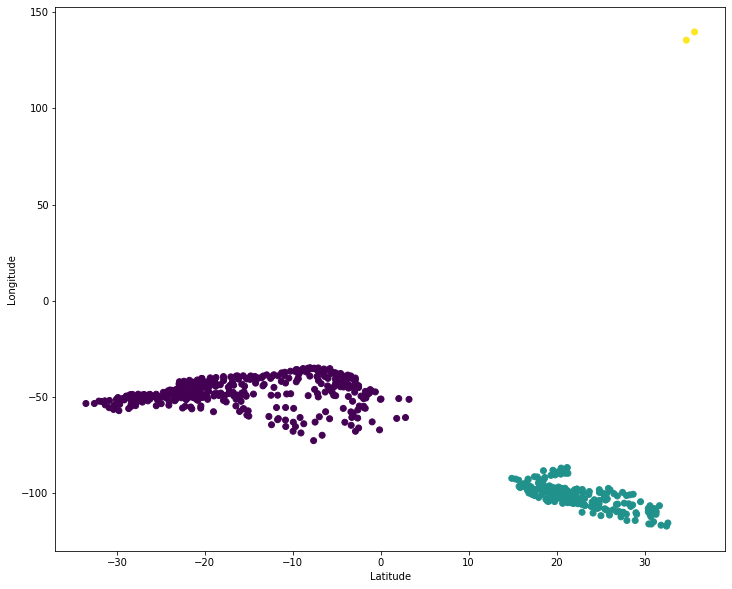

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(df_final_pandas['lat'], df_final_pandas['lng'], c=df_final_pandas.prediction)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()